### problem statement :   I decided to treat this as a classification problem by creating a new binaryvariable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.

In [1]:
# data description:
"""
The dataset contains 6366 observations of 9 variables:

1.rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
very good)

2. age: woman's age

3. yrs_married: number of years married

4. children: number of children

5. religious: woman's rating of how religious she is (1 = not religious, 4 =
strongly religious)

6. educ: level of education (9 = grade school, 12 = high school, 14 =
some college, 16 = college graduate, 17 = some graduate school, 20
= advanced degree)

7. occupation: woman's occupation (1 = student, 2 = farming/semi-
skilled/unskilled, 3 = "white collar", 4 =teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)

8. occupation_husb: husband's occupation (same coding as above)

9. affairs: time spent in extra-marital affairs


"""

'\nThe dataset contains 6366 observations of 9 variables:\n\n1.rate_marriage: woman\'s rating of her marriage (1 = very poor, 5 =\nvery good)\n\n2. age: woman\'s age\n\n3. yrs_married: number of years married\n\n4. children: number of children\n\n5. religious: woman\'s rating of how religious she is (1 = not religious, 4 =\nstrongly religious)\n\n6. educ: level of education (9 = grade school, 12 = high school, 14 =\nsome college, 16 = college graduate, 17 = some graduate school, 20\n= advanced degree)\n\n7. occupation: woman\'s occupation (1 = student, 2 = farming/semi-\nskilled/unskilled, 3 = "white collar", 4 =teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =\nprofessional with advanced degree)\n\n8. occupation_husb: husband\'s occupation (same coding as above)\n\n9. affairs: time spent in extra-marital affairs\n\n\n'

In [2]:
# Code to loading data and modules:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
dta = sm.datasets.fair.load_pandas().data
import seaborn as sns

#add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs >0).astype(int)
y,X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',dta, return_type="dataframe")
X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2','C(occupation)[T.3.0]':'occ_3','C(occupation)[T.4.0]':'occ_4','C(occupation)[T.5.0]':'occ_5','C(occupation)[T.6.0]':'occ_6','C(occupation_husb)[T.2.0]':'occ_husb_2','C(occupation_husb)[T.3.0]':'occ_husb_3','C(occupation_husb)[T.4.0]':'occ_husb_4','C(occupation_husb)[T.5.0]':'occ_husb_5','C(occupation_husb)[T.6.0]':'occ_husb_6'})
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,f1_score,precision_score,recall_score,classification_report

In [3]:
df = pd.concat([X,y],axis=1)

In [4]:
# checking null values
df.isnull().sum()

Intercept        0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
affair           0
dtype: int64

In [5]:
# remove irrelevent column
df.drop(['Intercept'],axis=1,inplace=True)

In [6]:
# let's do graphical analysis

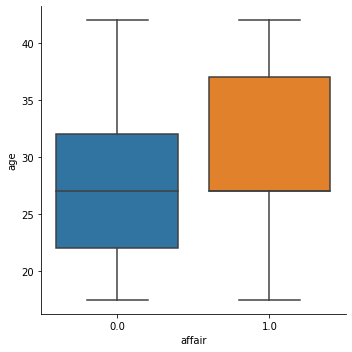

In [7]:
sns.catplot('affair','age',data=df,kind='box')

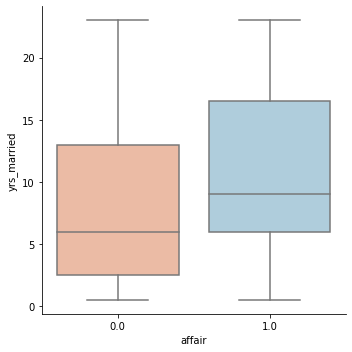

In [8]:
sns.catplot('affair','yrs_married',data=df,kind='box',palette='RdBu')

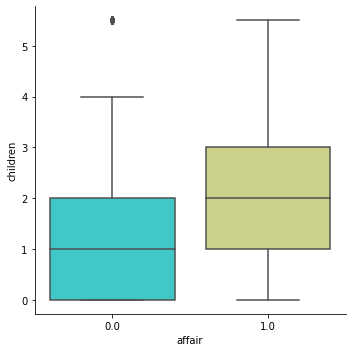

In [9]:
sns.catplot('affair','children',data=df,kind='box',palette='rainbow')

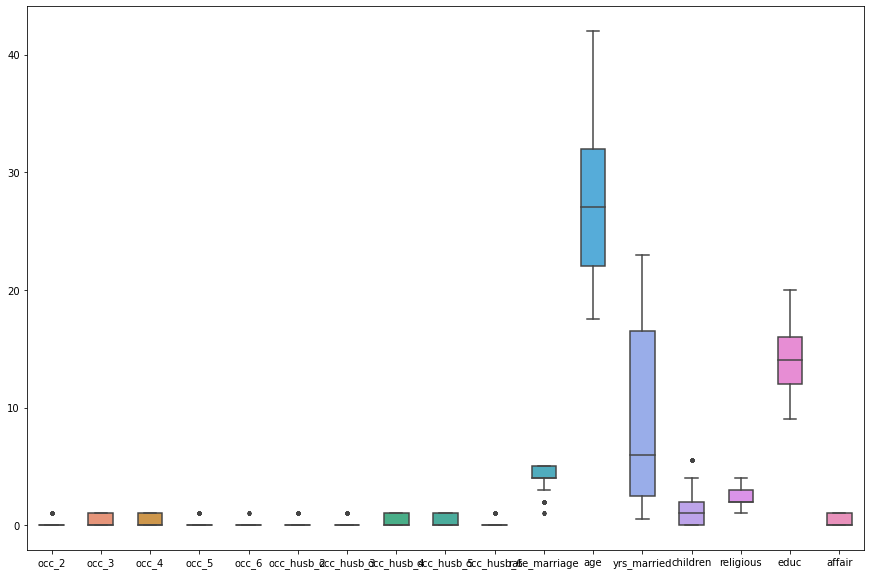

In [10]:
# check the outliers

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228716D60A0>,
      dtype=object)

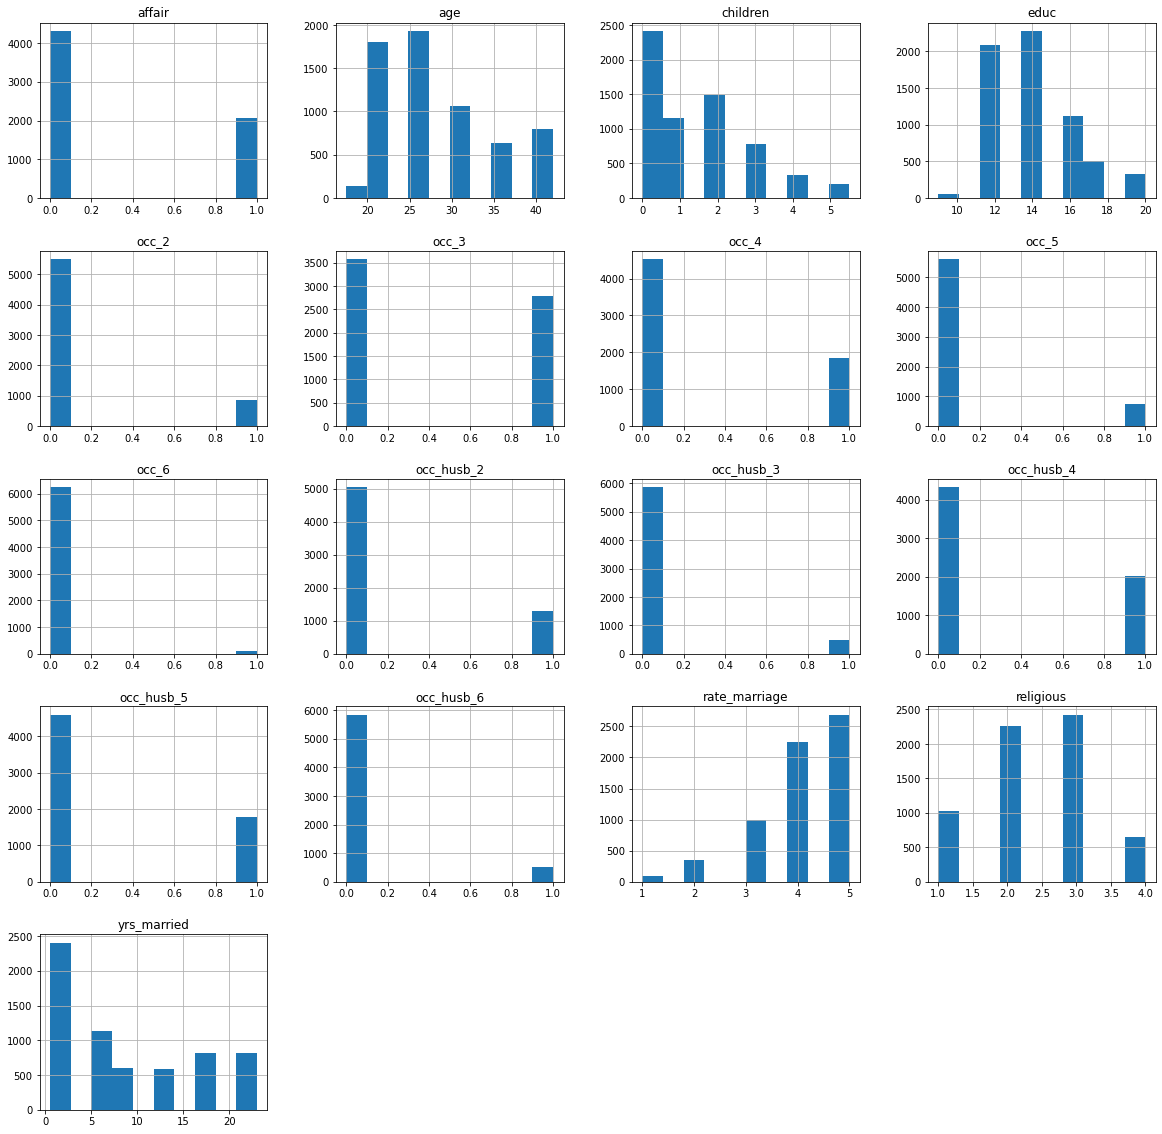

In [11]:
# checking distribution

df.hist(figsize=(20,20))

In [12]:
# feature scaling
x = df.drop(['affair'],axis=1)
y = df['affair']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
# let's do train test split for model building & evalution
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,test_size=.20,random_state=23)


print('xtrain size ', xtrain.shape)
print('xtest shape',xtest.shape)
print('ytrain shape',ytrain.shape)
print('ytest shape',ytest.shape)

xtrain size  (5092, 16)
xtest shape (1274, 16)
ytrain shape (5092,)
ytest shape (1274,)


In [14]:
logit = LogisticRegression()
logit.fit(xtrain,ytrain)
ytrain_pred = logit.predict(xtrain)
ytest_pred = logit.predict(xtest)
train_score = logit.score(xtrain,ytrain)
test_score = logit.score(xtest,ytest)
print('train score ',train_score)
print('test score ', test_score)

train score  0.7276119402985075
test score  0.716640502354788


In [15]:
# other evalution metrics
tn,fp,fn,tp= confusion_matrix(ytest,ytest_pred).ravel()
print('tn',tn)
print('fp',fp)
print('fn',fn)
print('tp',tp)
"""so there is huge no.  of FN"""

tn 782
fp 94
fn 267
tp 131


'so there is huge no.  of FN'

In [16]:
print('f1 score ',f1_score(ytest,ytest_pred))
print('precision score ',precision_score(ytest,ytest_pred))
print('recall score ',recall_score(ytest,ytest_pred))

f1 score  0.420545746388443
precision score  0.5822222222222222
recall score  0.32914572864321606


In [17]:
# classification_report
print(classification_report(ytest,ytest_pred,target_names=['not 1','1']))

              precision    recall  f1-score   support

       not 1       0.75      0.89      0.81       876
           1       0.58      0.33      0.42       398

    accuracy                           0.72      1274
   macro avg       0.66      0.61      0.62      1274
weighted avg       0.69      0.72      0.69      1274



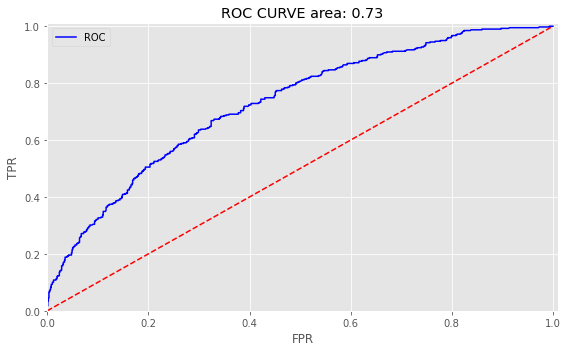

In [18]:
# ROC CURVE & AUC
ytest_prob = logit.decision_function(xtest)
fpr,tpr,thresh = roc_curve(ytest,ytest_prob)
auc = roc_auc_score(ytest,ytest_prob)

plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr,'b',label='ROC')
plt.ylim(0,1.01)
plt.xlim(0,1.01)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE area: {:.2f}'.format(auc))
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
import pickle
pickle.dump(logit,open('logit_model.sav','wb'))